<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [22]:
print( boston_df.groupby('CHAS').agg({'MEDV':['mean']}).reset_index())
scipy.stats.ttest_ind( boston_df[ boston_df['CHAS'] == 0]['MEDV'],
                    boston_df[ boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

  CHAS       MEDV
             mean
0  0.0  22.093843
1  1.0  28.440000


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Null hypothesis: no difference in median house prices
There is a significant difference in the median value of homes bordered by the Charles River and those not.
Since the p-value is less than 0.05, we reject the null hypothesis.

In [23]:
 #boston_df.groupby('AGE').agg({'MEDV':['mean']}).reset_index()

In [13]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'age_group'] = '70 years and older'

print( boston_df.groupby('age_group').agg({'MEDV':['mean']}).reset_index())

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
aa = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
bb = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
cc = boston_df[boston_df['age_group'] == '70 years and older']['MEDV'] 
f_statistic, p_value = scipy.stats.f_oneway(aa, bb, cc)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

                 age_group       MEDV
                                 mean
0     35 years and younger  27.775824
1       70 years and older  20.488323
2  between 35 and 70 years  25.072840
F_Statistic: 29.028583208977576, P-Value: 1.1723548056383608e-12


Null hypothesis: no difference in median house prices
Median home values vary markedly across AGE groups. Above all for '35 years and younger'
since the p-value is less than 0.05, the variance are not equal, we reject the null hypothesis.

In [15]:
#cont_table  = pd.crosstab(boston_df['NOX'], boston_df['INDUS'])
#cont_table
#scipy.stats.chi2_contingency(cont_table, correction = False)

X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           7.91e-98
Time:                        14:29:03   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Null hypothesis: There is no relationship between nitrogen oxide concentrations and the proportion of non-retail business acres in a city.
since the p-value is less than 0.05, we reject the null hypothesis.
There is a relationship between nitrogen oxide concentrations and the proportion of non-retail business acres in a city.

In [17]:

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        14:31:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Null hypothesis: distance to five Boston employment centers affects on the median value of houses
since the p-value is less than 0.05, we reject the null hypothesis. 

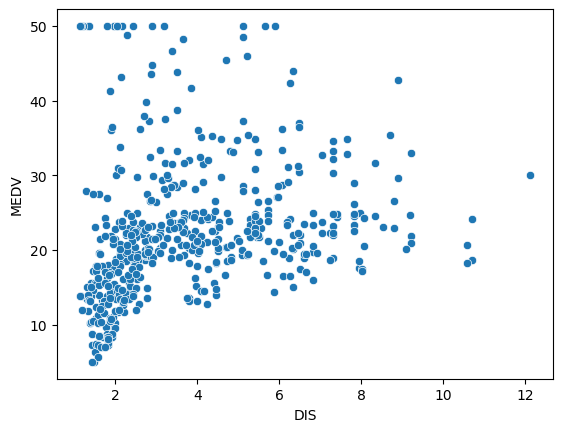

In [18]:
ax = sns.scatterplot(x='DIS', y='MEDV',
                     data=boston_df)

The effect of distance to five Boston employment centers on the median value of houses, according to the correlation coefficient, is very low. However, some relationship can be noted on the scatterplot

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

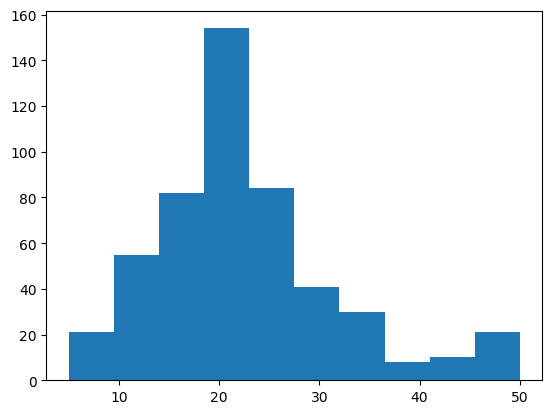

In [7]:
pyplot.hist(boston_df['MEDV'])

The most common houses cost about 20 000$

Text(0.5, 1.0, 'Charles river')

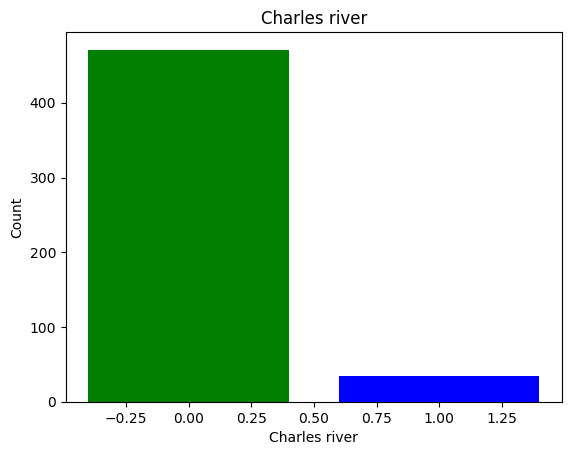

In [15]:

pyplot.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['green','blue'])
pyplot.xlabel('Charles river')
pyplot.ylabel('Count')
pyplot.title('Charles river')

There are many more houses near the river

<ipython-input-19-eb930e12a5e6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'], color='green', kde=False)
<ipython-input-19-eb930e12a5e6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df[boston_df['age_group'] == 'be

<AxesSubplot:xlabel='MEDV'>

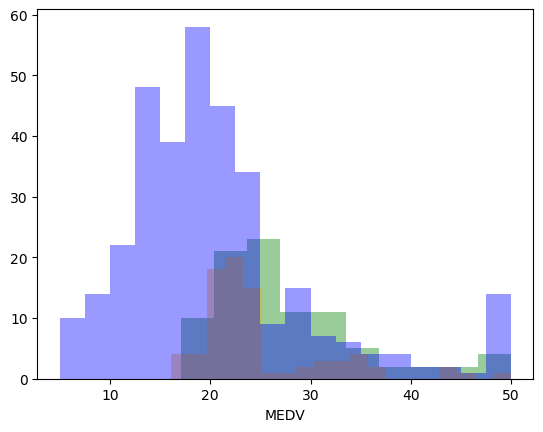

In [19]:

sns.distplot(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'], color='green', kde=False) 
sns.distplot(boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], color="orange", kde=False) 
sns.distplot(boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], color="blue", kde=False) 


There are more old houses, but they are cheaper.

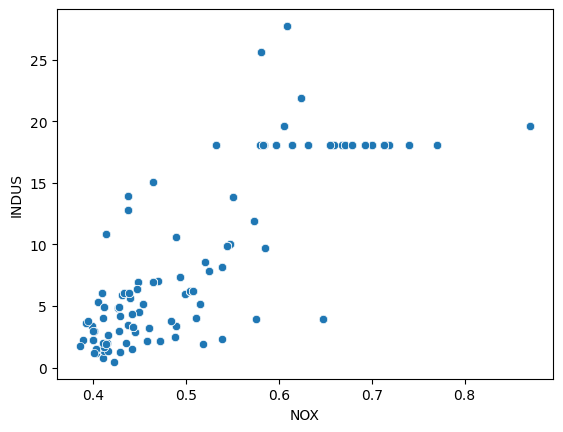

In [21]:
ax = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)

The relationship between nitrogen oxide concentrations and the proportion of acres not occupied by retail is linear and positive. 

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

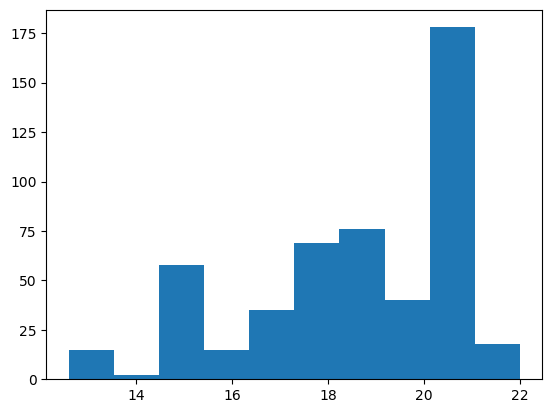

In [22]:
pyplot.hist(boston_df['PTRATIO'])

The distribution cannot be called a normal distribution. It is not bell shaped. The most common student-teacher ratio in the city is 20 students per teacher. This is an average class size. The second peak of about 15 students apparently falls in specific groups.